# Ensemble Vote Classifier

Agora que desenvolvemos alguns modelos relativamente eficazes vamos tentar combinar as suas previsões de modo a obtermos um modelo ainda mais eficaz!

In [1]:
from sklearn.datasets import load_iris
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from copy import deepcopy
from random import randint
from itertools import combinations 
from imblearn.over_sampling import SMOTE


train = pd.read_csv('prep_train.csv')


avg = 0
iss = []
while len(iss) < 5:
    r = randint(0,1000)
    if r not in iss:        
        X_train, X_test, y_train, y_test = train_test_split(train.drop(['Absent'],axis=1), 
                                                            train['Absent'], test_size=0.30, 
                                                            random_state=r)

        pipe1 = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height']), GaussianNB(priors=None, var_smoothing=1e-09))
        pipe2 = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son', 'Weight', 'Body mass index']), RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features=None, min_impurity_decrease=0.001, min_samples_split=16, n_estimators=20, oob_score=False))
        pipe3 = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Disciplinary failure']), LogisticRegression(C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, l1_ratio=0.1, max_iter=10, multi_class= 'ovr', penalty='l2', solver='liblinear', tol=0.1))
        pipe4 = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Height', 'Body mass index']), AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=100))
        pipe5 = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Weight']), GradientBoostingClassifier(learning_rate=0.01, loss='deviance', max_depth=3, max_features='auto', min_impurity_decrease=0.1, min_samples_split=2, n_estimators=100))
        pipe6 = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None))
        pipe7 = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), MLPClassifier(hidden_layer_sizes=(32,16)))

        eclf = EnsembleVoteClassifier(clfs=[pipe2, pipe6, pipe1, pipe3, pipe4, pipe5])
        
        
        eclf.fit(X_train,y_train)
        predictions = eclf.predict(X_test)
        avg = (avg*len(iss) + balanced_accuracy_score(y_test,predictions))/float(len(iss) + 1)
        iss.append(r)
print(avg)

Using TensorFlow backend.
/home/random/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/random/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/random/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/random/anaconda3/lib/python3.7/site-packages/tenso

0.6922191393457284


/home/random/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


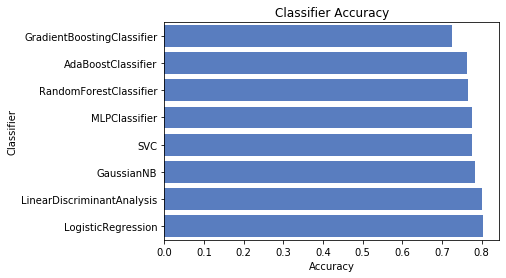

In [13]:
X_test = pd.read_csv('prep_test.csv')
y_test = pd.read_csv('problem_info/sample_submission.csv').drop('ID', axis=1)

train = pd.read_csv('prep_train.csv')
X_train = train.drop('Absent', axis=1)
y_train = train['Absent']

#sm = SMOTE(random_state=62)
#X_train, y_train = sm.fit_resample(X_train, y_train )

'''
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']

'''

pipe_nb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height']), GaussianNB(priors=None, var_smoothing=1e-09))
pipe_rf = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son', 'Weight', 'Body mass index']), RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features=None, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=5, oob_score=False))
pipe_lr = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Disciplinary failure']), LogisticRegression(C=1, dual=True, fit_intercept=True, intercept_scaling=10, max_iter=10, multi_class= 'ovr', penalty='l2', solver='liblinear', tol=0.0001))
pipe_ab = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Height', 'Body mass index']), AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=100))
pipe_gb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Weight']), GradientBoostingClassifier(learning_rate=1, loss='deviance', max_depth=None, max_features=None, min_impurity_decrease=1e-5, min_samples_split=4))
pipe_ld = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
pipe_ml = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), MLPClassifier(activation='tanh', alpha=0.0001, learning_rate_init=0.01, max_iter=100, solver='lbfgs', hidden_layer_sizes=(8,4)))
pipe_sv = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), SVC(C=10, decision_function_shape='ovr', gamma='scale', kernel='rbf', probability=True, shrinking=True, tol=0.0001))

clfs= [ pipe_nb, pipe_rf, pipe_lr, pipe_ab, pipe_gb, pipe_ld, pipe_ml, pipe_sv]


dict = {}
for c in clfs:
    c.fit(X_train, y_train)
    dict[c[1].__class__.__name__] = accuracy_score(y_test,c.predict(X_test))

log_cols = ["Classifier", "Accuracy"]
    
log 	 = pd.DataFrame(columns=log_cols)
    
for clf in dict:
	dict[clf] = dict[clf] 
	log_entry = pd.DataFrame([[clf, dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

log = log.sort_values(by=['Accuracy'])
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [4]:
X_test = pd.read_csv('prep_test.csv')
y_test = pd.read_csv('problem_info/sample_submission.csv').drop('ID', axis=1)

train = pd.read_csv('prep_train.csv')
X_train = train.drop('Absent', axis=1)
y_train = train['Absent']

#sm = SMOTE(random_state=62)
#X_train, y_train = sm.fit_resample(X_train, y_train )

'''
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']

'''

pipe_nb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height']), GaussianNB(priors=None, var_smoothing=1e-09))
pipe_rf = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son', 'Weight', 'Body mass index']), RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features=None, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=5, oob_score=False))
pipe_lr = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Disciplinary failure']), LogisticRegression(C=1, dual=True, fit_intercept=True, intercept_scaling=10, max_iter=10, multi_class= 'ovr', penalty='l2', solver='liblinear', tol=0.0001))
pipe_ab = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Height', 'Body mass index']), AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=100))
pipe_gb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Weight']), GradientBoostingClassifier(learning_rate=1, loss='deviance', max_depth=None, max_features=None, min_impurity_decrease=1e-5, min_samples_split=4))
pipe_ld = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
pipe_ml = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), MLPClassifier(activation='tanh', alpha=0.0001, learning_rate_init=0.01, max_iter=100, solver='lbfgs', hidden_layer_sizes=(8,4)))
pipe_sv = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), SVC(C=10, decision_function_shape='ovr', gamma='scale', kernel='rbf', probability=True, shrinking=True, tol=0.0001))

clfs= [ pipe_nb, pipe_rf, pipe_lr, pipe_ab, pipe_gb, pipe_ld, pipe_ml]
'''

maxx = 0
for i in range(1, len(clfs) + 1):
    print(i)
    for c in combinations(clfs, i):
        eclf = EnsembleVoteClassifier(clfs=deepcopy(c))

        eclf.fit(X_train,y_train)
        predictions = eclf.predict(X_test)
        
        if balanced_accuracy_score(y_test,predictions) >= maxx:
            maxx = balanced_accuracy_score(y_test,predictions)
            best = c

'''

eclf = EnsembleVoteClassifier(clfs=clfs)


eclf.fit(X_train,y_train)



predictions = eclf.predict(X_test)
'''
for x in best:
    print(x[1].__class__.__name__, end=', ')
print('')
'''
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(balanced_accuracy_score(y_test,predictions))

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.36      0.09      0.15        44
           1       0.83      0.96      0.89       196

    accuracy                           0.80       240
   macro avg       0.59      0.53      0.52       240
weighted avg       0.74      0.80      0.75       240

[[  4  40]
 [  7 189]]
0.8041666666666667
0.5275974025974026


/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [133]:
test_rows = pd.read_csv('problem_info/test_data.csv')
data = {'ID': test_rows['ID'], 'Absent' : [int(x) for x in predictions]}
data = pd.DataFrame(data)
data.to_csv('submit.csv', index=False)

In [134]:
X_test = pd.read_csv('prep_test.csv')
y_test = pd.read_csv('problem_info/sample_submission.csv').drop('ID', axis=1)

train = pd.read_csv('prep_train.csv')
X_train = train.drop('Absent', axis=1)
y_train = train['Absent']

pipe_nb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height']), GaussianNB(priors=None, var_smoothing=1e-09))
pipe_rf = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son', 'Weight', 'Body mass index']), RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features=None, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=5, oob_score=False))
pipe_lr = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Disciplinary failure']), LogisticRegression(C=1, dual=True, fit_intercept=True, intercept_scaling=10, max_iter=10, multi_class= 'ovr', penalty='l2', solver='liblinear', tol=0.0001))
pipe_ab = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Height', 'Body mass index']), AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=100))
pipe_gb = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Weight']), GradientBoostingClassifier(learning_rate=1, loss='deviance', max_depth=None, max_features=None, min_impurity_decrease=1e-5, min_samples_split=4))
pipe_ld = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
pipe_ml = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), MLPClassifier(activation='tanh', alpha=0.0001, learning_rate_init=0.01, max_iter=100, solver='lbfgs', hidden_layer_sizes=(8,4)))
pipe_sv = make_pipeline(ColumnSelector(cols=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']), SVC(C=10, decision_function_shape='ovr', gamma='scale', kernel='rbf', probability=True, shrinking=True, tol=0.0001))

clfs= [ pipe_nb, pipe_rf, pipe_lr, pipe_ab, pipe_gb, pipe_ld, pipe_ml]


prediction_weight = 1
lpredictions = []

for c in clfs:
    c.fit(X_train, y_train)
    lpredictions.append(c.predict(X_test))

predictions = []
for i in range(0, X_test.shape[0]):
    p = 0
    for l in lpredictions:
        p += l[i]*prediction_weight
    p /= float(len(lpredictions))
    if p > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)


print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').